In [222]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [223]:
##import data 

In [224]:
df= pd.read_csv('daily_min_temp.csv',index_col="Date",parse_dates=["Date"])
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


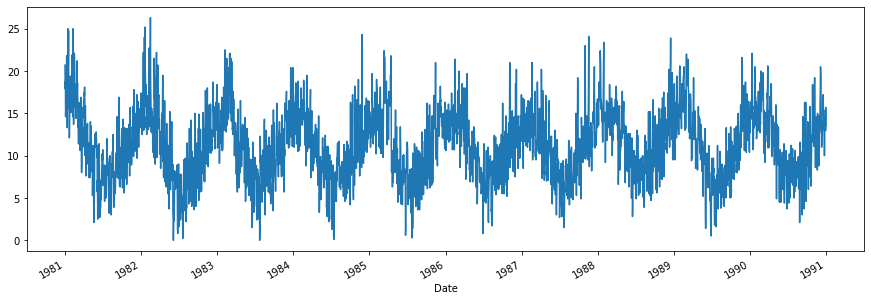

In [225]:
df.Temp.plot(figsize=(15,5))

In [226]:
df=df.resample('M').mean()
df

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


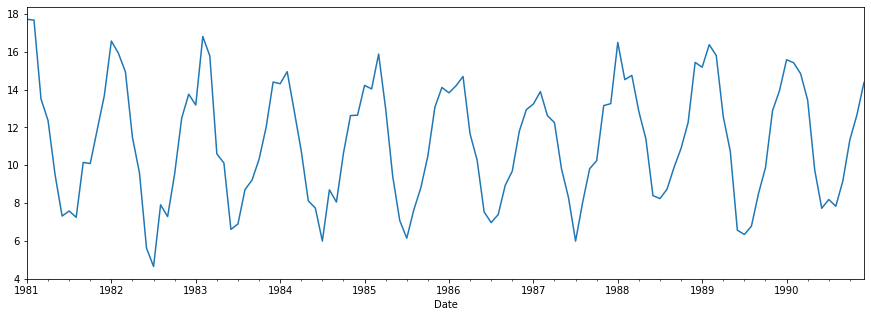

In [227]:
df.Temp.plot(figsize=(15,5))

In [228]:
## one shift

In [229]:
#pred=df.copy()
#pred=pred.shift()

In [230]:
df['Temp']

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
                ...    
1990-08-31     7.825806
1990-09-30     9.166667
1990-10-31    11.345161
1990-11-30    12.656667
1990-12-31    14.367742
Freq: M, Name: Temp, Length: 120, dtype: float64

In [231]:
pred

0     8.550753
1     7.909892
2     8.392115
3     9.445878
4    11.056165
Name: Temp, dtype: float64

In [232]:
#predkinya, one shift. 

In [233]:
#plt.figure(figsize=(15,5))
#plt.plot(df,"#034580")
#plt.plot(pred,"r-")

In [234]:
#moving avarage 

In [235]:
pred=df.copy()
pred.Temp=df.rolling(3).mean()
pred=pred.shift()
pred

,Temp
Date,
1981-01-31,NaN
1981-02-28,NaN
1981-03-31,NaN
1981-04-30,16.297158
1981-05-31,14.511746
...,...
1990-08-31,8.550753
1990-09-30,7.909892
1990-10-31,8.392115


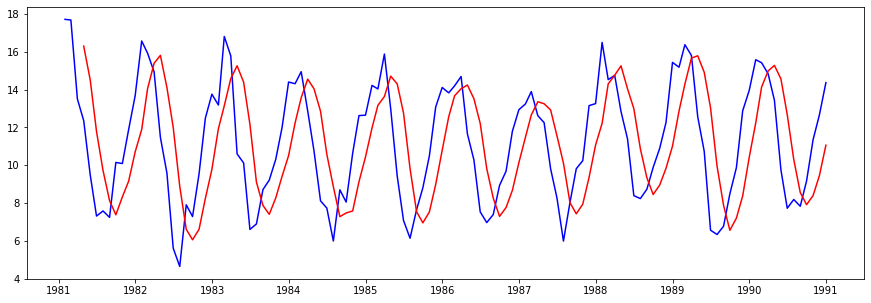

In [236]:
plt.figure(figsize=(15,5))
plt.plot(df,"b-")
plt.plot(pred,"r-")

In [237]:
#MAE 

In [238]:
from sklearn.metrics import mean_absolute_error

In [239]:
df.Temp

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
                ...    
1990-08-31     7.825806
1990-09-30     9.166667
1990-10-31    11.345161
1990-11-30    12.656667
1990-12-31    14.367742
Freq: M, Name: Temp, Length: 120, dtype: float64

In [240]:
pred=pred.tail(5)["Temp"].reset_index()['Temp']

In [241]:
pred

0     8.550753
1     7.909892
2     8.392115
3     9.445878
4    11.056165
Name: Temp, dtype: float64

In [242]:
actual=df.tail(5)["Temp"].reset_index()['Temp']

In [243]:
actual

0     7.825806
1     9.166667
2    11.345161
3    12.656667
4    14.367742
Name: Temp, dtype: float64

In [244]:
error=mean_absolute_error(actual,pred)
print(error)

2.291426523297491
